In [1]:
import json
import os

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
import json
from collections import defaultdict
import pandas as pd
import numpy as np

# Dictionary to store all benchmark results
all_results = []

for model in ["LIBERO_REALTIME", "LIBERO_PI0", "LIBERO_PYTORCH"]:
    benchmark_results_dir = f"/nethome/dhe83/flash/openpi/benchmarks/l40s_{model}"
    
    # Load all benchmark files
    for filename in os.listdir(benchmark_results_dir):
        if filename.endswith('.json'):
            filepath = os.path.join(benchmark_results_dir, filename)
            
            with open(filepath, 'r') as f:
                data = json.load(f)
            
            # Extract summary statistics and metadata
            result = {
                'model': model,
                'filename': filename,
                'date': data['date'],
                'env': data['env'],
                'num_steps': data['num_steps'],
                'action_horizon': data['action_horizon'],
                'batch_size': data['batch_size'],
                'num_requests': data['num_requests'],
                'request_rate': data['request_rate'],
                'max_concurrency': data['max_concurrency'],
                'duration': data['duration'],
                'completed': data['completed'],
                'failed': data['failed'],
                'request_throughput': data['request_throughput'],
                'mean_latency_ms': data['mean_latency_ms'],
                'median_latency_ms': data['median_latency_ms'],
                'std_latency_ms': data['std_latency_ms'],
                'p95_latency_ms': data['p95_latency_ms'],
                'p99_latency_ms': data['p99_latency_ms'],
                'gpu_name': data.get('gpu_info', {}).get('gpu_name', 'Unknown'),
            }
            
            all_results.append(result)

# Create DataFrame with summary statistics
df_summary = pd.DataFrame(all_results)
df_summary['date'] = pd.to_datetime(df_summary['date'])
df_summary = df_summary.sort_values(['model', 'date'])

print(f"Loaded {len(df_summary)} benchmark runs")
print(f"\nModels: {df_summary['model'].unique()}")
print(f"\nSummary DataFrame shape: {df_summary.shape}")
df_summary.head()

Loaded 67 benchmark runs

Models: ['LIBERO_PI0' 'LIBERO_PYTORCH' 'LIBERO_REALTIME']

Summary DataFrame shape: (67, 20)


,model,filename,date,env,num_steps,action_horizon,batch_size,num_requests,request_rate,max_concurrency,duration,completed,failed,request_throughput,mean_latency_ms,median_latency_ms,std_latency_ms,p95_latency_ms,p99_latency_ms,gpu_name
34,LIBERO_PI0,benchmark-libero-20260113-170537.json,2026-01-13 17:05:37.451055+00:00,libero,10,50,4,300,10.0,300,30.302295,300,0,9.900240,241.412919,239.033010,53.647718,323.239425,351.799754,NVIDIA L40S
42,LIBERO_PI0,benchmark-libero-20260113-170542.json,2026-01-13 17:05:42.793232+00:00,libero,10,50,8,300,10.0,300,30.505047,300,0,9.834438,412.410586,416.656062,80.566431,530.606992,543.545228,NVIDIA L40S
40,LIBERO_PI0,benchmark-libero-20260113-170543.json,2026-01-13 17:05:43.059348+00:00,libero,10,50,16,300,10.0,300,30.581182,300,0,9.809954,763.091102,759.437364,145.966302,993.399946,1008.510231,NVIDIA L40S
33,LIBERO_PI0,benchmark-libero-20260113-170555.json,2026-01-13 17:05:55.902515+00:00,libero,10,50,32,300,10.0,300,31.187873,300,0,9.619123,1499.215384,1505.221744,300.419923,1967.530997,2000.447970,NVIDIA L40S
27,LIBERO_PI0,benchmark-libero-20260113-170558.json,2026-01-13 17:05:58.625777+00:00,libero,10,50,2,300,20.0,300,15.641176,300,0,19.180143,589.159566,601.400405,223.818797,983.400097,1075.646679,NVIDIA L40S


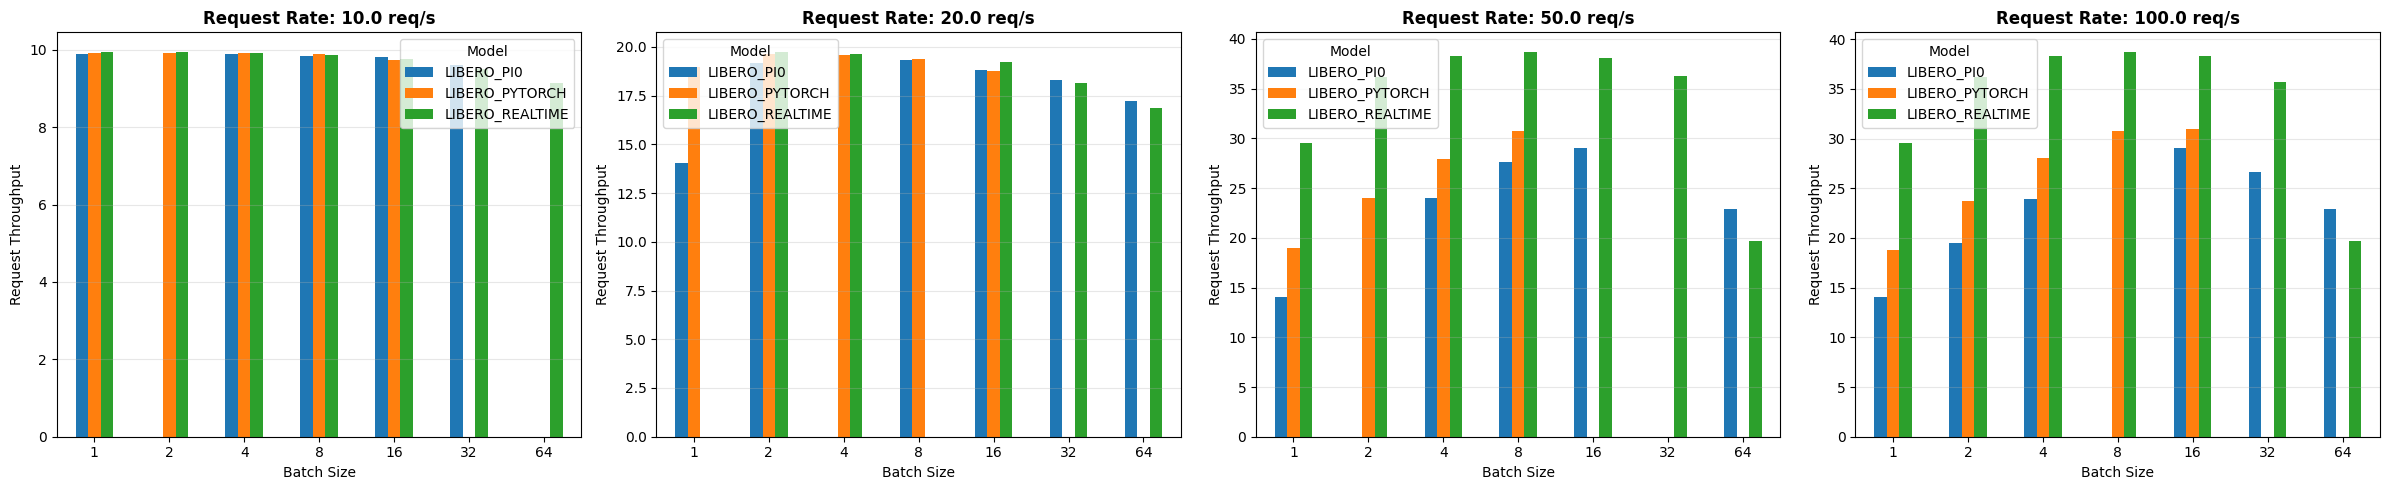

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose your metric
metric = 'request_throughput'  # You can change this to any column

# Get unique request rates
request_rates = sorted(df_summary['request_rate'].unique())

# Create a subplot for each request_rate
n_rates = len(request_rates)
fig, axes = plt.subplots(1, n_rates, figsize=(6*n_rates, 5), squeeze=False)
axes = axes.flatten()

for idx, rate in enumerate(request_rates):
    ax = axes[idx]
    
    # Filter data for this request rate
    df_rate = df_summary[df_summary['request_rate'] == rate]
    
    # Pivot for easier plotting: rows=batch_size, cols=model
    pivot_data = df_rate.pivot_table(
        values=metric, 
        index='batch_size', 
        columns='model', 
        aggfunc='mean'  # In case there are multiple runs
    )
    
    # Create grouped bar chart
    pivot_data.plot(kind='bar', ax=ax, rot=0)
    
    ax.set_title(f'Request Rate: {rate} req/s', fontsize=12, fontweight='bold')
    ax.set_xlabel('Batch Size')
    ax.set_ylabel(metric.replace('_', ' ').title())
    ax.legend(title='Model')
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()